In [1]:
import fetch_data as f
import process_data as p
import graph_data as g

# establish universal regions, plus a scrap bin
region_list = ["w", "m", "s", "n"]

# request dataset from online and store it in a variable
f.write_to_csv("https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/download/209268.17.17.tar.gz","209268.17.17.tar.gz",)

disaster_data = p.read_csv_to_var(
    "./0209268/17.17/data/0-data/events-US-1980-2023.csv"
)

# modify dates to be less specific years
p.parse_all_years(disaster_data)

# universal variables
all_years = p.retrieve_unique_years(disaster_data)
all_disaster_types = p.retrieve_unique_disaster_types(disaster_data)
year_buckets = ["1980 - 1984","1985 - 1989","1990 - 1994","1995 - 1999","2000 - 2004","2005 - 2009","2010 - 2014","2015 - 2019","2020 - 2023"] # TO FILL. buckets to group time data by (one/four/five/ten-year groups)
year_buckets_size = 5 # number of years per bucket
# convert the raw data (sorted by region) into graphable blocks of data
region_dict = p.fill_all_regions(disaster_data, region_list)
cost_of_regions, deaths_of_regions = p.organize_regions(region_dict, all_years, all_disaster_types, year_buckets_size)


now we graph!

{'Flooding': [7486.5, 2396.3, 2050.0, 3345.7, 0, 4493.9, 10003.6, 23069.1, 2641.1], 'Tropical Cyclone': [11357.2, 27269.399999999998, 72013.4, 36051.6, 371543.4, 52168.3, 7067.5, 461831.5, 209751.0], 'Drought': [9307.3, 5050.2, 2704.8, 6703.3, 0, 0, 0, 3150.0, 0], 'Freeze': [2019.2, 8572.0, 0, 0, 0, 0, 0, 1260.0, 0], 'Severe Storm': [0, 1367.6, 2580.4, 3112.1, 3059.2, 13191.6, 13744.2, 40610.7, 33077.200000000004], 'Winter Storm': [0, 0, 6264.7, 1284.9, 0, 0, 0, 0, 0], 'Wildfire': [0, 0, 0, 0, 0, 0, 0, 0, 0]}


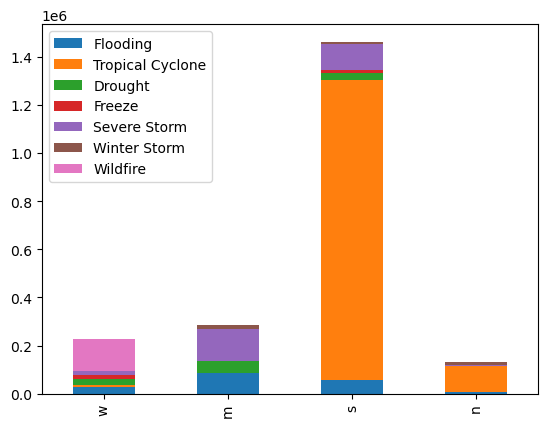

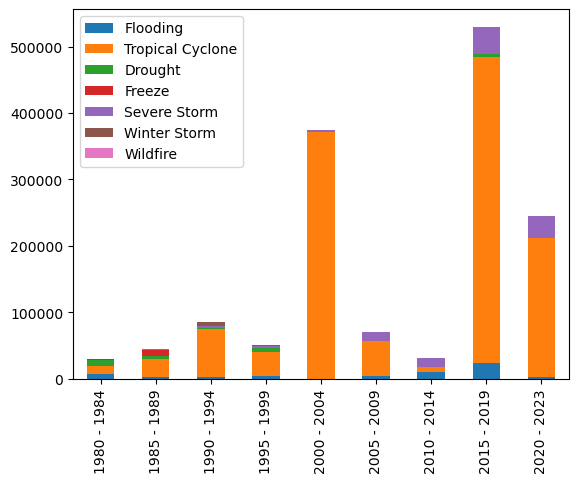

In [2]:
all_regions_cost = g.plottable_by_region(cost_of_regions,all_disaster_types)
g.plot_dataframe(all_regions_cost)

south_cost = g.plottable_by_time(cost_of_regions,"s",year_buckets)
g.plot_dataframe(south_cost)